In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
from scipy.stats import f_oneway, mannwhitneyu
from IPython.display import Image, display
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df.shape

(100000, 9)

In [4]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [5]:
encoder = LabelEncoder()

In [6]:
df.gender = encoder.fit_transform(df.gender)

In [7]:
gender_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

In [8]:
gender_mapping

{'Female': 0, 'Male': 1, 'Other': 2}

In [9]:
df.smoking_history.unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [10]:
df.smoking_history = encoder.fit_transform(df.smoking_history)

In [11]:
smoke_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

In [12]:
smoke_mapping

{'No Info': 0,
 'current': 1,
 'ever': 2,
 'former': 3,
 'never': 4,
 'not current': 5}

In [13]:
df = df.loc[df.gender != 2]

In [14]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [15]:
def two_histagrams(x, y, name_x, name_y):
    sns.set_palette("pastel")
    x.hist(alpha = 0.5, weights = [1/len(x)]*len(x), color = 'red', label=name_x)
    y.hist(alpha = 0.5, weights = [1/len(y)]*len(y), color = 'green', label = name_y)
    plt.axvline(x.median(), color = 'red', ls='--', label = f"median {name_x}")
    plt.axvline(y.median(), color = 'green', ls='dashdot', label = f"median {name_y}")
    plt.legend()
    plt.show()

In [16]:
def box_plot(values, names, title):
    sns.set_palette("pastel")
    fig = plt.figure(figsize =(10, 7))
    plt.title(title)
    plt.boxplot(values, patch_artist=True, labels=names)
    plt.ylabel('PRICE, UAN')
    plt.show()

In [17]:
male = df[df['gender']==1]['diabetes']
female = df[df['gender']==0]['diabetes']

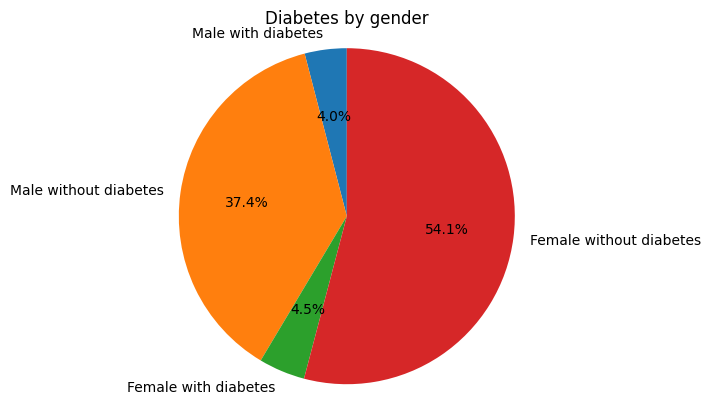

In [18]:
labels = ['Male with diabetes', 'Male without diabetes', 'Female with diabetes', 'Female without diabetes']
sizes = [male.sum(), (1-male).sum(), female.sum(), (1-female).sum()]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Diabetes by gender')
plt.show()

In [19]:
smoke_mapping

{'No Info': 0,
 'current': 1,
 'ever': 2,
 'former': 3,
 'never': 4,
 'not current': 5}

In [20]:
no_info = df[(df['smoking_history'] == 0) & (df['diabetes'] == 1)]['diabetes']
current = df[(df['smoking_history'] == 1) & (df['diabetes'] == 1)]['diabetes']
ever = df[(df['smoking_history'] == 2) & (df['diabetes'] == 1)]['diabetes']
former = df[(df['smoking_history'] == 3) & (df['diabetes'] == 1)]['diabetes']
never = df[(df['smoking_history'] == 4) & (df['diabetes'] == 1)]['diabetes']
not_current = df[(df['smoking_history'] == 5) & (df['diabetes'] == 1)]['diabetes']
no_info_0 = df[(df['smoking_history'] == 0) & (df['diabetes'] == 0)]['diabetes']
current_0 = df[(df['smoking_history'] == 1) & (df['diabetes'] == 0)]['diabetes']
ever_0 = df[(df['smoking_history'] == 2) & (df['diabetes'] == 0)]['diabetes']
former_0 = df[(df['smoking_history'] == 3) & (df['diabetes'] == 0)]['diabetes']
never_0 = df[(df['smoking_history'] == 4) & (df['diabetes'] == 0)]['diabetes']
not_current_0 = df[(df['smoking_history'] == 5) & (df['diabetes'] == 0)]['diabetes']

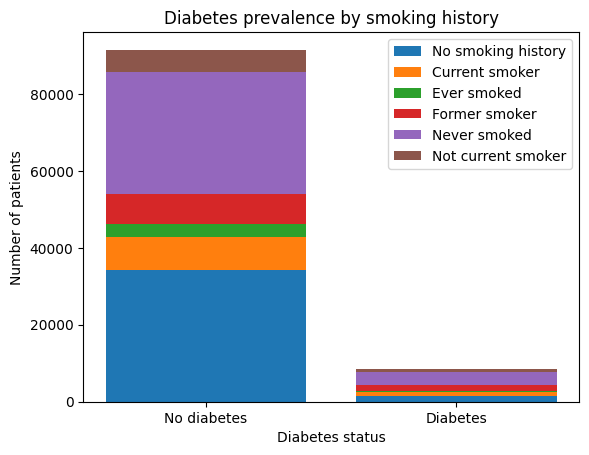

In [21]:
no_info_data = [no_info_0.count(), no_info.count()]
current_data = [current_0.count(), current.count()]
ever_data = [ever_0.count(), ever.count()]
former_data = [former_0.count(), former.count()]
never_data = [never_0.count(), never.count()]
not_current_data = [not_current_0.count(), not_current.count()]

# Define the labels for the x-axis and the legend
labels = ['No diabetes', 'Diabetes']
legend_labels = ['No smoking history', 'Current smoker', 'Ever smoked', 'Former smoker', 'Never smoked', 'Not current smoker']

# Create the stacked bar plot
plt.bar(labels, no_info_data, label=legend_labels[0])
plt.bar(labels, current_data, bottom=no_info_data, label=legend_labels[1])
plt.bar(labels, ever_data, bottom=[sum(x) for x in zip(no_info_data, current_data)], label=legend_labels[2])
plt.bar(labels, former_data, bottom=[sum(x) for x in zip(no_info_data, current_data, ever_data)], label=legend_labels[3])
plt.bar(labels, never_data, bottom=[sum(x) for x in zip(no_info_data, current_data, ever_data, former_data)], label=legend_labels[4])
plt.bar(labels, not_current_data, bottom=[sum(x) for x in zip(no_info_data, current_data, ever_data, former_data, never_data)], label=legend_labels[5])

# Add a title, axis labels, and legend
plt.title('Diabetes prevalence by smoking history')
plt.xlabel('Diabetes status')
plt.ylabel('Number of patients')
plt.legend()

# Show the plot
plt.show()

<AxesSubplot: >

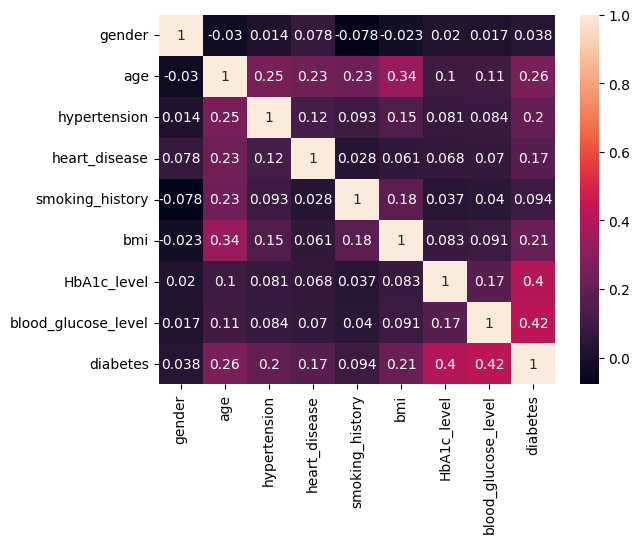

In [24]:
sns.heatmap(df.corr(), annot = True)

In [28]:
x = df.loc[:, df.columns != 'diabetes']

In [29]:
y = df['diabetes']

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

In [36]:
logistic = LogisticRegression(solver='liblinear')

In [37]:
logistic.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [38]:
logistic_pred = logistic.predict(x_test)

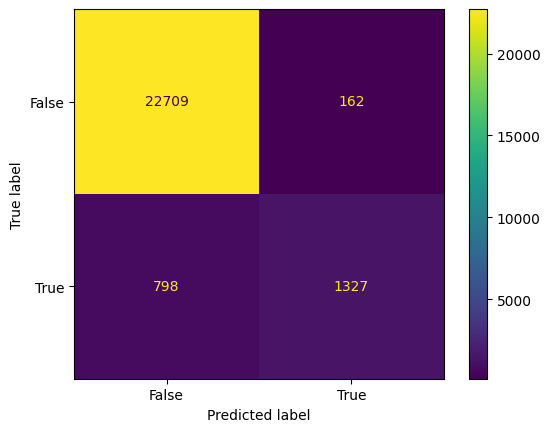

In [47]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, logistic_pred), display_labels = [False, True])
cm_display.plot()
plt.show()

In [48]:
confusion_matrix(y_test, logistic_pred)

array([[22709,   162],
       [  798,  1327]], dtype=int64)

In [50]:
f1_score(y_test, logistic_pred, average='binary')

0.7343663530713891

In [61]:
accuracy_score(y_test, logistic_pred)

0.9615938550168027

In [53]:
def drow(depth, score, best_depth, best_score, min_leaf, model):
    plt.title(f"{model}")
    plt.xlabel('depth')
    plt.ylabel('score')
    sns.set_palette("pastel")
    
    plt.plot(depth, score, label = 'score from depth')
    plt.scatter(best_depth, best_score, color = 'red', label = f'best score {best_score.round(2)}: min leaf {min_leaf}, max depth {best_depth}')
    
    plt.legend()
    plt.show()

In [54]:
def get_depth_leaf_tree(model, n_estimators = True):
    score_depth_leaf = []
    plot_score = []
    plot_depth = []
    for i in range(1, 20):
        for j in range(1, 10):
            if n_estimators:
                model_res = model(n_estimators=150, max_depth= i, min_samples_leaf= j)
            else:
                model_res = model(random_state=42, max_depth= i, min_samples_leaf= j)
            score = cross_val_score(model_res, x_train, y_train, cv = 5)
            score_depth_leaf.append((score.mean(), i, j))
            plot_depth.append(i)
            plot_score.append(score.mean())

    def take_score(elem: tuple):
        return elem[0]

    max_score = max(score_depth_leaf, key=take_score)
    best_score, best_depth, min_leaf = max_score
    drow(plot_depth, plot_score, best_depth, best_score, min_leaf, model)
    return max_score

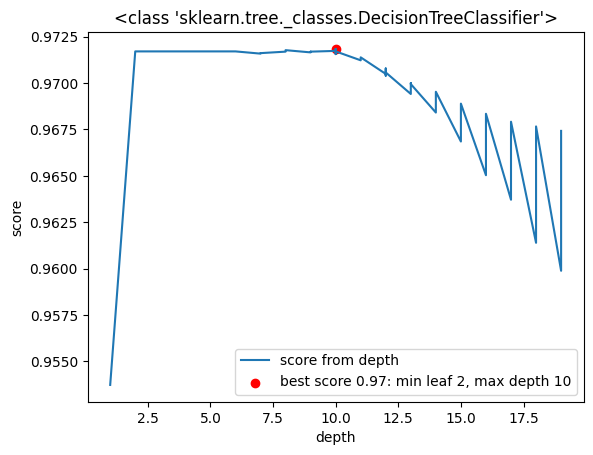

(0.9718347598932597, 10, 2)

In [55]:
get_depth_leaf_tree(DecisionTreeClassifier, n_estimators=False)

In [56]:
tree = DecisionTreeClassifier(max_depth=10, min_samples_leaf=2)

In [57]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2)

In [58]:
tree_predict = tree.predict(x_test)

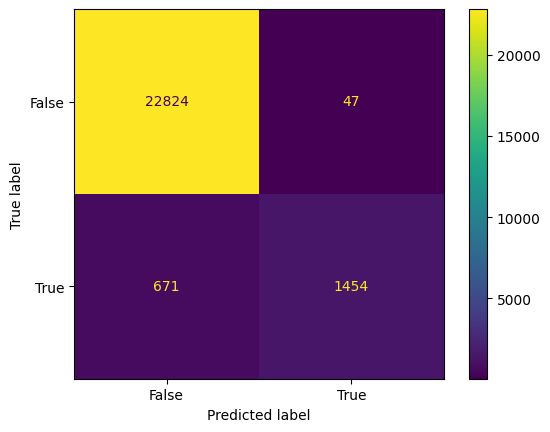

In [59]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, tree_predict), display_labels = [False, True])
cm_display.plot()
plt.show()

In [60]:
f1_score(y_test, tree_predict, average='binary')

0.8019856591285162

In [62]:
accuracy_score(y_test, tree_predict)

0.9712754040646503

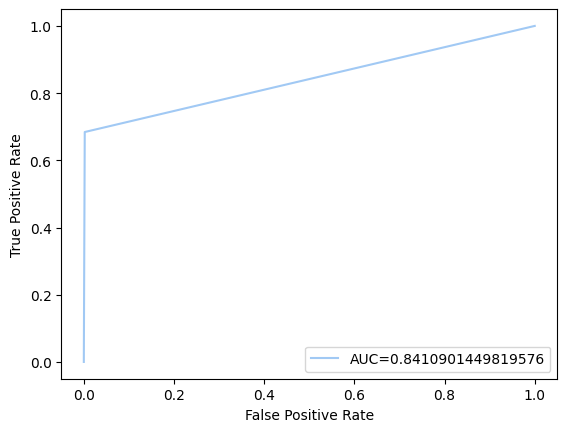

In [67]:
fpr, tpr, _ = roc_curve(y_test,  tree_predict)
auc = roc_auc_score(y_test, tree_predict)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()